# This dataset contain information of hotel booking of two hotels, We will perform exploratory data analysis to get insight from the data.  


## We will try to answer the following Questions
### 1. How Many Booking Were Cancelled?
### 2. Which is the most busy month for hotel?
### 3. What is the percentage of booking for each year?
### 4. How Long People Stay in the hotel?
### 5. Which was the most booked accommodation type (Single, Couple, Family)?
### 6. What is the booking ratio between Resort Hotel and City Hotel?
### 7. From which country most guest come?

# After that we will make predictive model to predict whether the booking will be cancelled or not

## **We will:**
### - Perform the Data Selection to select only relevant features
### - Tranform the Data (Categorial to Numerical)
### - Split the data (Train Test Split)
### - Model the data (Fit the Data)
### - And finally Evaluate our model

## Importing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry as pc

pd.options.display.max_columns = None

In [2]:
## Importing Data from Dataset
data = pd.read_csv('E:/LPU Classes/2nd year summer training course/project/hotel_bookings.csv')

In [3]:
## Show the data
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## Data Pre-processing

In [4]:
## Copy the dataset so nothing happens to the original dataset and we can work on the copied one.

df = data.copy()

### 1. Finding Missing Values

In [5]:
## Find the missing value, show the total null values for each column and sort it in descending order

df.isnull().sum().sort_values(ascending=False)[:10]

company                   112593
agent                      16340
country                      488
children                       4
reserved_room_type             0
assigned_room_type             0
booking_changes                0
deposit_type                   0
hotel                          0
previous_cancellations         0
dtype: int64

In [6]:
## If no id of agent or company is null, just replace it with 0

df[['agent','company']] = df[['agent','company']].fillna(0.0)

In [7]:
## For the missing values in the country column, replace it with mode (value that appears most often)

df['country'].fillna(data.country.mode().to_string(), inplace=True)

In [8]:
## for missing children value, replace it with rounded mean value

df['children'].fillna(round(data.children.mean()), inplace=True)

In [9]:
## Drop Rows where there is no adult, baby and child

df = df.drop(df[(df.adults+df.babies+df.children)==0].index)

### 2. Convert Datatypes

In [10]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [11]:
## convert datatype of these columns from float to integer

df[['children', 'company', 'agent']] = df[['children', 'company', 'agent']].astype('int64')

## Data Analysis

In [12]:
def get_count(series, limit=None):
    
    '''
    INPUT:
        series: Pandas Series (Single Column from DataFrame)
        limit:  If value given, limit the output value to first limit samples.
    OUTPUT:
        x = Unique values
        y = Count of unique values
    '''
    
    if limit != None:
        series = series.value_counts()[:limit]
    else:
        series = series.value_counts()
    
    x = series.index
    y = series/series.sum()*100
    
    return x.values,y.values

In [13]:
def plot(x, y, x_label=None,y_label=None, title=None, figsize=(7,5), type='bar'):
    
    '''
    INPUT:
        x:        Array containing values for x-axis
        y:        Array containing values for y-axis
        x_lable:  String value for x-axis label
        y_lable:  String value for y-axis label
        title:    String value for plot title
        figsize:  tuple value, for figure size
        type:     type of plot (default is bar plot)
        
    OUTPUT:
        Display the plot
    '''
    
    
    
    fig, ax = plt.subplots(figsize=figsize)
    
    if x_label != None:
        ax.set_xlabel(x_label)
    
    if y_label != None:
        ax.set_ylabel(y_label)
        
    if title != None:
        ax.set_title(title)
    
    if type == 'bar':
        plt.bar(x,y,color=['lightgreen', 'hotpink', 'khaki', 'crimson', 'deepskyblue', 'limegreen', 'lightcoral', 'tan', 'orchid', 'chocolate', 'steelblue', 'orange', 'violet', 'indianred', 'darkcyan'])
    elif type == 'line':
        plt.plot(x,y, color='lightcoral')
        
    
    plt.show()

### 1. How Many Booking Were Cancelled?

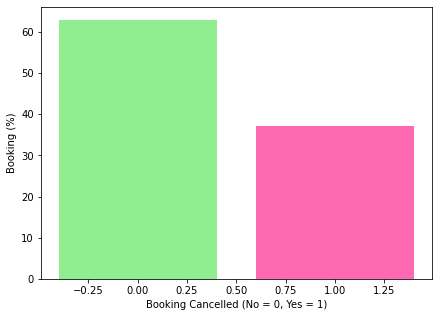

In [14]:
x,y = get_count(df['is_canceled'])
plot(x,y, x_label='Booking Cancelled (No = 0, Yes = 1)', y_label='Booking (%)')

In [15]:
# For further analysis, Select only those booking which did not get cancelled.
df_not_canceled = df[df['is_canceled'] == 0]

### 2. Which is the most busy month for hotel?

### Including Both Hotels

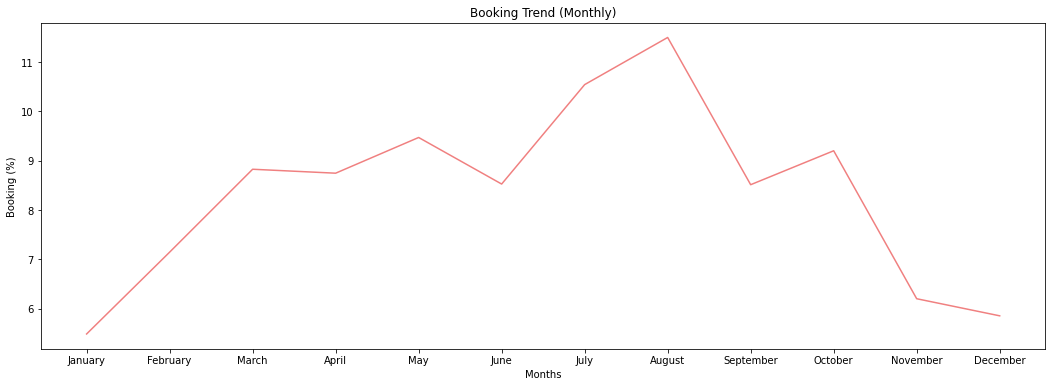

In [16]:
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

sorted_months = df_not_canceled['arrival_date_month'].value_counts().reindex(new_order)

x = sorted_months.index
y = sorted_months/sorted_months.sum()*100


# matplotlib line graph
plot(x, y.values, x_label='Months', y_label='Booking (%)', title='Booking Trend (Monthly)', type='line', figsize=(18,6))

### Separating the two Hotels

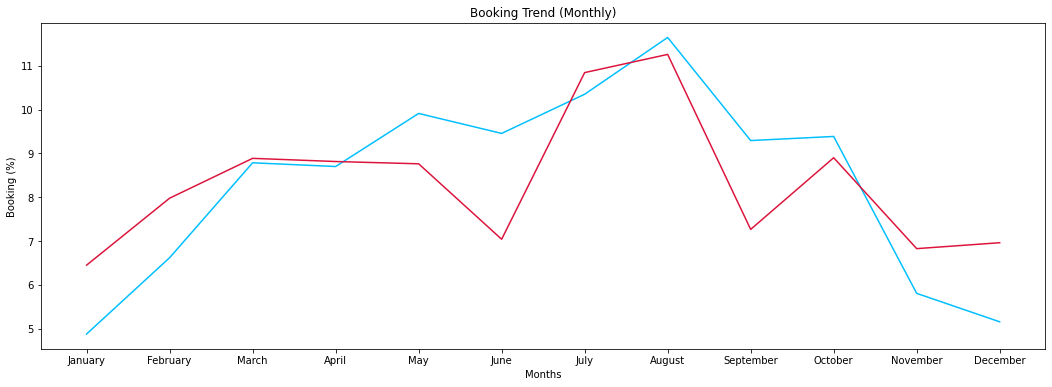

In [17]:
## Order of months
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


## Select only City Hotel
sorted_months = df_not_canceled.loc[df.hotel=='City Hotel' ,'arrival_date_month'].value_counts().reindex(new_order)

x1 = sorted_months.index
y1 = sorted_months/sorted_months.sum()*100



## Select only Resort Hotel
sorted_months = df_not_canceled.loc[df.hotel=='Resort Hotel' ,'arrival_date_month'].value_counts().reindex(new_order)

x2 = sorted_months.index
y2 = sorted_months/sorted_months.sum()*100






## Draw the line plot

fig, ax = plt.subplots(figsize=(18,6))

ax.set_xlabel('Months')
ax.set_ylabel('Booking (%)')
ax.set_title('Booking Trend (Monthly)')


plt.plot(x1, y1.values, label='City Hotel', color='deepskyblue')
plt.plot(x1, y2.values, label='Resort Hotel', color='crimson')

plt.show()

### 3. What is the percentage of booking for each year?

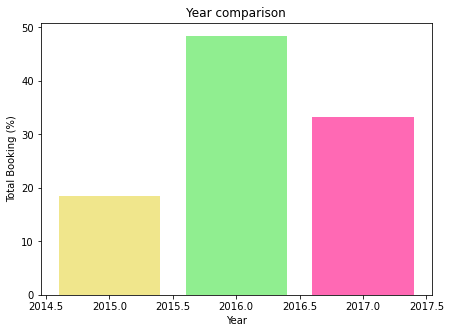

In [18]:
x,y = get_count(df_not_canceled['arrival_date_year'])
plot(x,y, x_label='Year', y_label='Total Booking (%)', title='Year comparison')

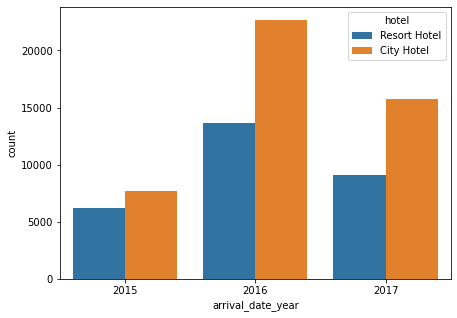

In [19]:
# Let’s separate it by the hotel

plt.subplots(figsize=(7,5))
sns.countplot(x='arrival_date_year', hue='hotel',  data=df_not_canceled);

### 4. How Long People Stay in the hotel?

### For both Hotels Combined

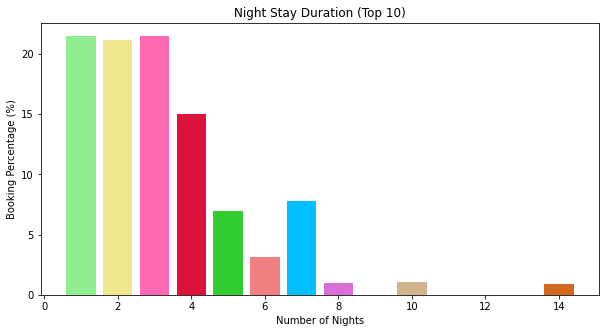

In [20]:
total_nights = df_not_canceled['stays_in_weekend_nights']+ df_not_canceled['stays_in_week_nights']
x,y = get_count(total_nights, limit=10)

plot(x,y, x_label='Number of Nights', y_label='Booking Percentage (%)', title='Night Stay Duration (Top 10)', figsize=(10,5))

### Separating The Two Hotels

C:\Users\Mahendra Garapati\anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\Mahendra Garapati\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


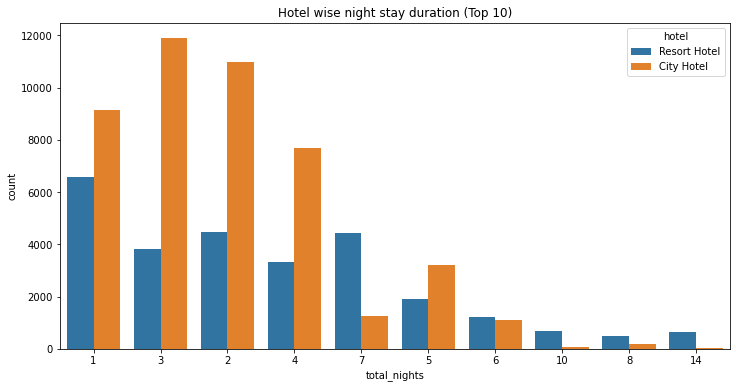

In [21]:
df_not_canceled.loc[:,'total_nights'] = df_not_canceled['stays_in_weekend_nights']+ df_not_canceled['stays_in_week_nights']

fig, ax = plt.subplots(figsize=(12,6))
ax.set_xlabel('No of Nights')
ax.set_ylabel('No of Nights')
ax.set_title('Hotel wise night stay duration (Top 10)')
sns.countplot(x='total_nights', hue='hotel', data=df_not_canceled,
              order = df_not_canceled.total_nights.value_counts().iloc[:10].index, ax=ax);

### 5. Which was the most booked accommodation type (Single, Couple, Family)?

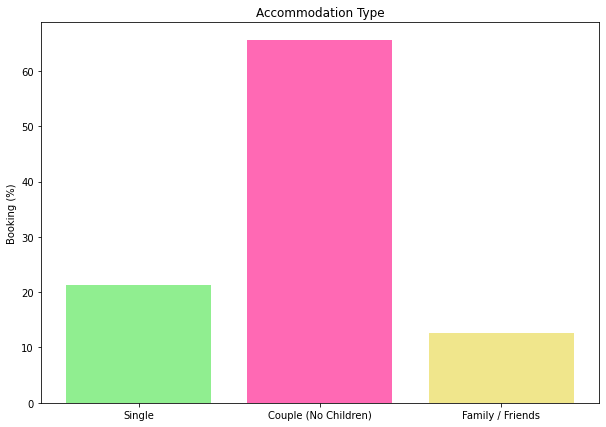

In [22]:
## Select single, couple, multiple adults and family
single   = df_not_canceled[(df_not_canceled.adults==1) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
couple   = df_not_canceled[(df_not_canceled.adults==2) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
#n_adults = df_not_canceled[(df_not_canceled.adults>2) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
family   = df_not_canceled[df_not_canceled.adults + df_not_canceled.children + df_not_canceled.babies > 2]


## Make the list of Category names, and their total percentage
names = ['Single', 'Couple (No Children)', 'Family / Friends']
count = [single.shape[0],couple.shape[0], family.shape[0]]
count_percent = [x/df_not_canceled.shape[0]*100 for x in count]


## Draw the curve
plot(names,count_percent,  y_label='Booking (%)', title='Accommodation Type', figsize=(10,7))

### 6. What is the booking ratio between Resort Hotel and City Hotel?

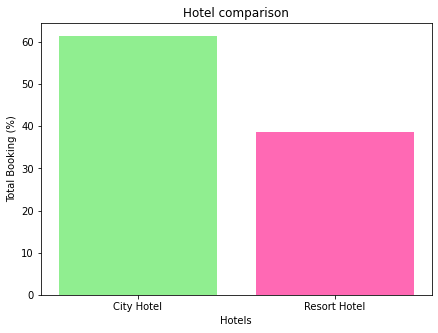

In [23]:
x,y = get_count(df_not_canceled['hotel'])
plot(x,y, x_label='Hotels', y_label='Total Booking (%)', title='Hotel comparison')

### 7. From which country most guest come?

#### `**pycountry** is very useful python package.`  
#### `We will use this package to get country names from country codes`

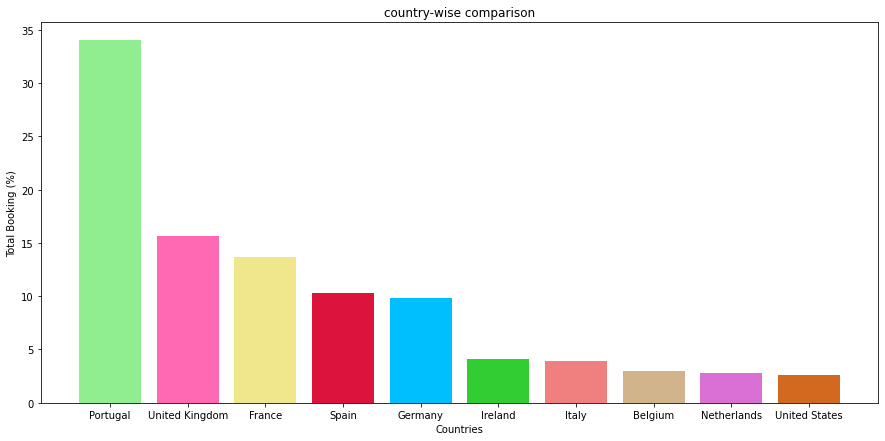

In [24]:
import pycountry as pc

x,y = get_count(df_not_canceled['country'], limit=10)

## For each country code select the country name 
country_name = [pc.countries.get(alpha_3=name).name for name in x]

plot(country_name,y, x_label='Countries', y_label='Total Booking (%)', title='country-wise comparison', figsize=(15,7))

## Feature Selection and Feature Engineering

In [25]:
## Copy the dataframe
df_subset = df.copy()

In [26]:
## Remove reservation_status column
## because it tells us if booking was cancelled 
df_subset = df_subset.drop(['reservation_status'], axis=1)

In [27]:
## Make the new column which contain 1 if guest received the same room which was reserved otherwise 0
df_subset['Room'] = 0
df_subset.loc[ df_subset['reserved_room_type'] == df_subset['assigned_room_type'] , 'Room'] = 1


## Make the new column which contain 1 if the guest has cancelled more booking in the past
## than the number of booking he did not cancel, otherwise 0

df_subset['net_cancelled'] = 0
df_subset.loc[ df_subset['previous_cancellations'] > df_subset['previous_bookings_not_canceled'] , 'net_cancelled'] = 1

In [28]:
## Remove the less important features
df_subset = df_subset.drop(['arrival_date_year','arrival_date_week_number','arrival_date_day_of_month','arrival_date_month','assigned_room_type','reserved_room_type','reservation_status_date','previous_cancellations','previous_bookings_not_canceled'],axis=1)

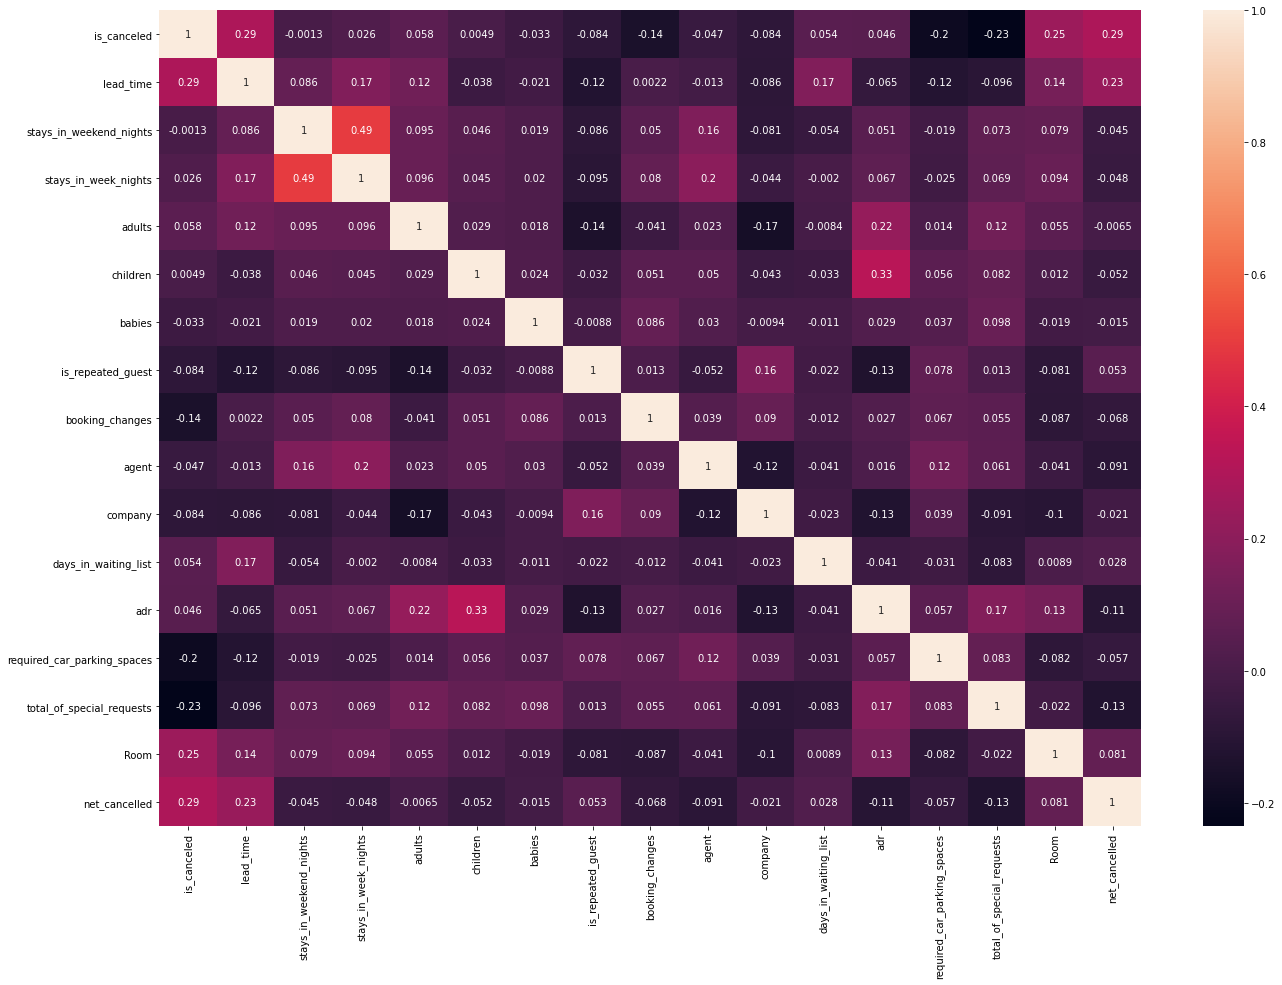

In [29]:
## Plot the heatmap to see correlation with columns
fig, ax = plt.subplots(figsize=(22,15))
sns.heatmap(df_subset.corr(), annot=True, ax=ax);

## Modeling

### 1. `Converting Categorical variables to Numerical`

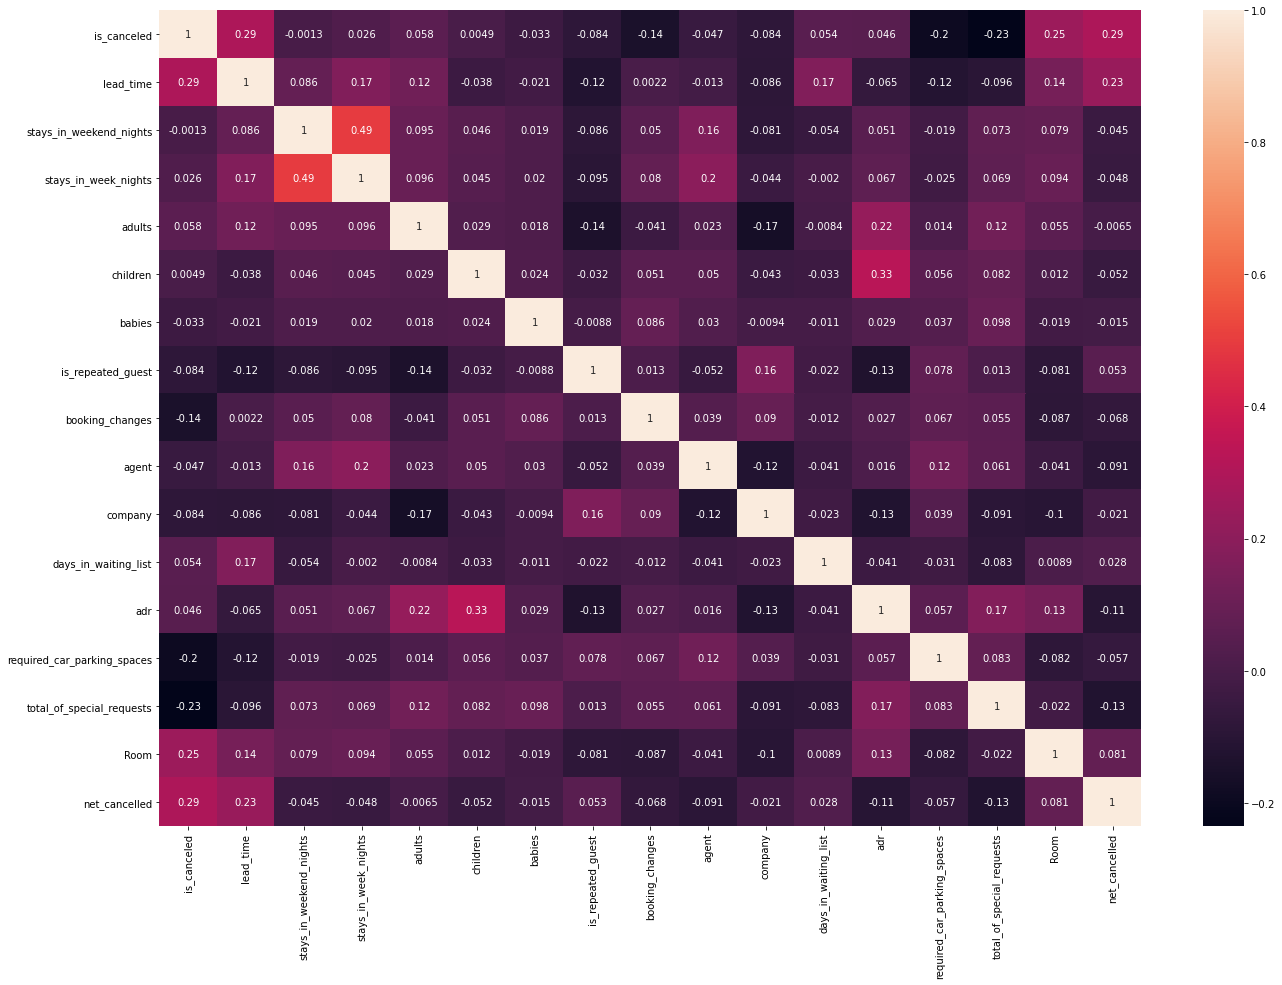

In [30]:
## Plot the heatmap to see correlation with columns
fig, ax = plt.subplots(figsize=(22,15))
sns.heatmap(df_subset.corr(), annot=True, ax=ax);

In [31]:
df = data.copy()

In [32]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [33]:
df['country'] = df['country'].replace(np.nan, 'PRT')
df['agent'] = df['agent'].replace(np.nan, 0)

In [34]:
df.isnull()
df.isnull().sum().sum()
df.dropna(inplace=True)

In [35]:
df1 = df.drop('is_canceled' , axis = 1)

In [36]:

x = df1.iloc[:,0:31].values
y = df.iloc[:,1].values
print(y)
print(x)

[0 1 1 ... 0 0 0]
[['Resort Hotel' 0 2015 ... 0 'Check-Out' '2015-07-02']
 ['Resort Hotel' 1 2015 ... 1 'Canceled' '2015-07-08']
 ['Resort Hotel' 1 2015 ... 1 'Canceled' '2015-07-08']
 ...
 ['City Hotel' 40 2017 ... 0 'Check-Out' '2017-08-30']
 ['City Hotel' 0 2017 ... 2 'Check-Out' '2017-08-30']
 ['City Hotel' 22 2017 ... 4 'Check-Out' '2017-09-01']]


In [37]:
df1.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
18,Resort Hotel,0,2015,July,27,1,0,1,2,0.0,0,BB,FRA,Corporate,Corporate,0,0,0,A,G,0,No Deposit,0.0,110.0,0,Transient,107.42,0,0,Check-Out,2015-07-02
218,Resort Hotel,1,2015,July,28,8,0,1,2,0.0,0,BB,PRT,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0.0,110.0,0,Transient,104.72,0,1,Canceled,2015-07-08
219,Resort Hotel,1,2015,July,28,8,0,1,2,0.0,0,BB,PRT,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0.0,110.0,0,Transient,104.72,0,1,Canceled,2015-07-08
220,Resort Hotel,1,2015,July,28,8,0,2,2,0.0,0,BB,CHE,Corporate,Corporate,0,0,0,A,F,0,No Deposit,0.0,110.0,0,Transient,104.72,1,1,Check-Out,2015-07-10
295,Resort Hotel,84,2015,July,28,11,1,1,2,0.0,0,HB,PRT,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0.0,113.0,0,Transient,100.00,1,0,Check-Out,2015-07-13


In [38]:
from sklearn.preprocessing import LabelEncoder
x_labelencoder = LabelEncoder()
x[:, 0] = x_labelencoder.fit_transform(x[:, 0])


y = y.reshape(-1,1)
print(y)


[[0]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]


In [39]:
x[:, 3] = x_labelencoder.fit_transform(x[:, 3])

In [40]:
x[:, 11] = x_labelencoder.fit_transform(x[:, 11])


In [41]:
x[:, 12] = x_labelencoder.fit_transform(x[:, 12])


In [42]:
x[:, 13] = x_labelencoder.fit_transform(x[:, 13])


In [43]:
x[:, 14] = x_labelencoder.fit_transform(x[:, 14])


In [44]:
x[:, 18] = x_labelencoder.fit_transform(x[:, 18])


In [45]:
x[:, 19] = x_labelencoder.fit_transform(x[:, 19])


In [46]:
x[:, 21] = x_labelencoder.fit_transform(x[:, 21])


In [47]:
x[:, 25] = x_labelencoder.fit_transform(x[:, 25])

In [48]:
x[:, 29] = x_labelencoder.fit_transform(x[:, 27])


In [49]:
x[:, 30] = x_labelencoder.fit_transform(x[:, 30])

In [50]:
print(x)

[[1 0 2015 ... 0 0 1]
 [1 1 2015 ... 1 0 3]
 [1 1 2015 ... 1 0 3]
 ...
 [0 40 2017 ... 0 0 705]
 [0 0 2017 ... 2 0 705]
 [0 22 2017 ... 4 0 707]]


### `2.Train Test Split`

In [51]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0) 


In [52]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()  
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

### `3. Machine Learning Model (Decision Tree)`

In [53]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

### `4. Prediction`

In [54]:
y_pred= classifier.predict(x_test)  
print(y_pred)
print(y_test)

[1 0 0 ... 0 1 0]
[[1]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


### `5. Confusion Matrix`

In [55]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
cm

array([[1292,   83],
       [  83,  242]], dtype=int64)

### `6. Accuracy`

In [56]:
def Score(classifier,x_train,y_train,x_test,y_test):
    train_score = classifier.score(x_train,y_train)
    test_score = classifier.score(x_test,y_test)

    print("========================================")
    print(f'Training Accuracy of our model is: {train_score}')
    print(f'Test Accuracy of our model is: {test_score}')
    print("========================================")
    
    
Score(classifier,x_train,y_train,x_train,y_train)

Training Accuracy of our model is: 1.0
Test Accuracy of our model is: 1.0
